%%capture
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.11/dist-packages/scipy/__init__.py)

In [ ]:
!gdown --id 12U-E_hLakouZXtAVx67wN4V4XriIIDEV
import zipfile
import os
zip_file_path = '/content/fer2013.csv.zip'
destination_directory = '/content/extracted/'
os.makedirs(destination_directory, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)
extracted_files = os.listdir(destination_directory)
print("Extracted files:", extracted_files)

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12U-E_hLakouZXtAVx67wN4V4XriIIDEV
To: /content/fer2013.csv.zip
100% 101M/101M [00:00<00:00, 206MB/s] 
Extracted files: ['fer2013.csv']


In [ ]:
data = pd.read_csv("fer2013.csv.zip")
data.shape

(35887, 3)

In [ ]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [ ]:
data.head()

NameError: name 'data' is not defined

In [ ]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
pink_color_scale = ["#FF66CC", "#FF80DF", "#FF99E6", "#FFB3F0", "#FFCCE6", "#FFD9EB", "#FFE5F2"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] ,
             color = np.unique(data['emotion']) ,
             color_continuous_scale=pink_color_scale)
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
data = data.sample(frac=1)

In [ ]:
labels = to_categorical(data[['emotion']], num_classes=7)

In [ ]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

In [ ]:
pixels = train_pixels.reshape((35887*2304,1))

In [ ]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

In [ ]:
pixels = train_pixels.reshape((35887, 48, 48,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


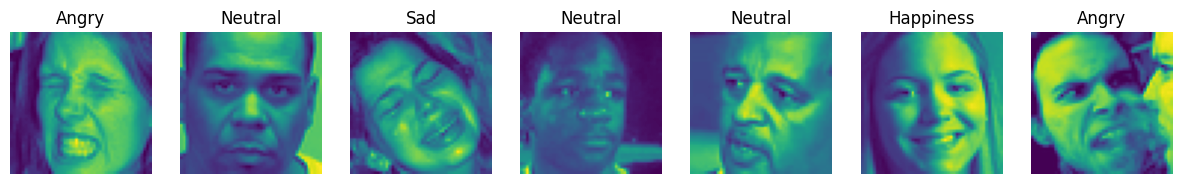

In [ ]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)

In [ ]:
datagen.fit(X_train)
valgen.fit(X_val)

In [ ]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_val, y_val, batch_size=64)

In [ ]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = tf.keras.optimizers.legacy.Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
  return model

In [ ]:
model = cnn_model()


In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.legacy.Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [ ]:
history = model.fit(train_generator,
                    epochs=45,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/45
455/455 [==============================] - ETA: 0s - loss: 13.9860 - accuracy: 0.1859
Epoch 1: val_accuracy improved from -inf to 0.24489, saving model to best_model.h5
455/455 [==============================] - 34s 50ms/step - loss: 13.9860 - accuracy: 0.1859 - val_loss: 12.7354 - val_accuracy: 0.2449
Epoch 2/45
454/455 [============================>.] - ETA: 0s - loss: 11.9848 - accuracy: 0.2149
Epoch 2: val_accuracy improved from 0.24489 to 0.27492, saving model to best_model.h5
455/455 [==============================] - 23s 50ms/step - loss: 11.9828 - accuracy: 0.2148 - val_loss: 10.7168 - val_accuracy: 0.2749
Epoch 3/45
454/455 [============================>.] - ETA: 0s - loss: 9.9500 - accuracy: 0.2331
Epoch 3: val_accuracy improved from 0.27492 to 0.28328, saving model to best_model.h5
455/455 [==============================] - 22s 48ms/step - loss: 9.9478 - accuracy: 0.2330 - val_loss: 8.8034 - val_accuracy: 0.2833
Epoch 4/45
455/455 [==============================] 

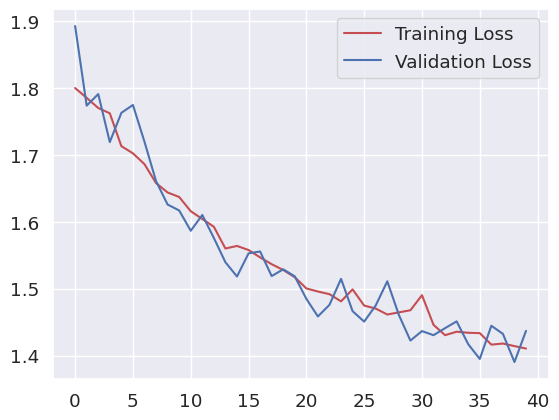

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

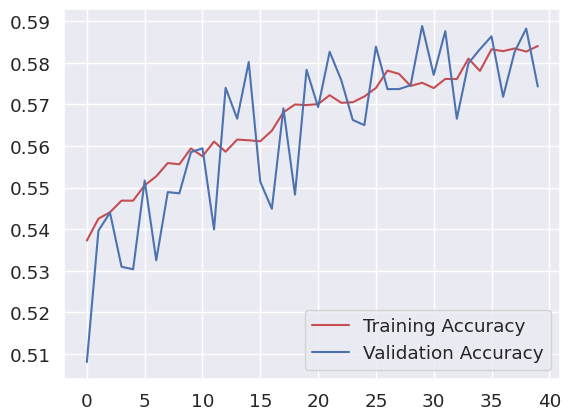

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 2s 9ms/step - loss: 1.4911 - accuracy: 0.6066
Test Acc: 0.6065756678581238


In [ ]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 1s 6ms/step


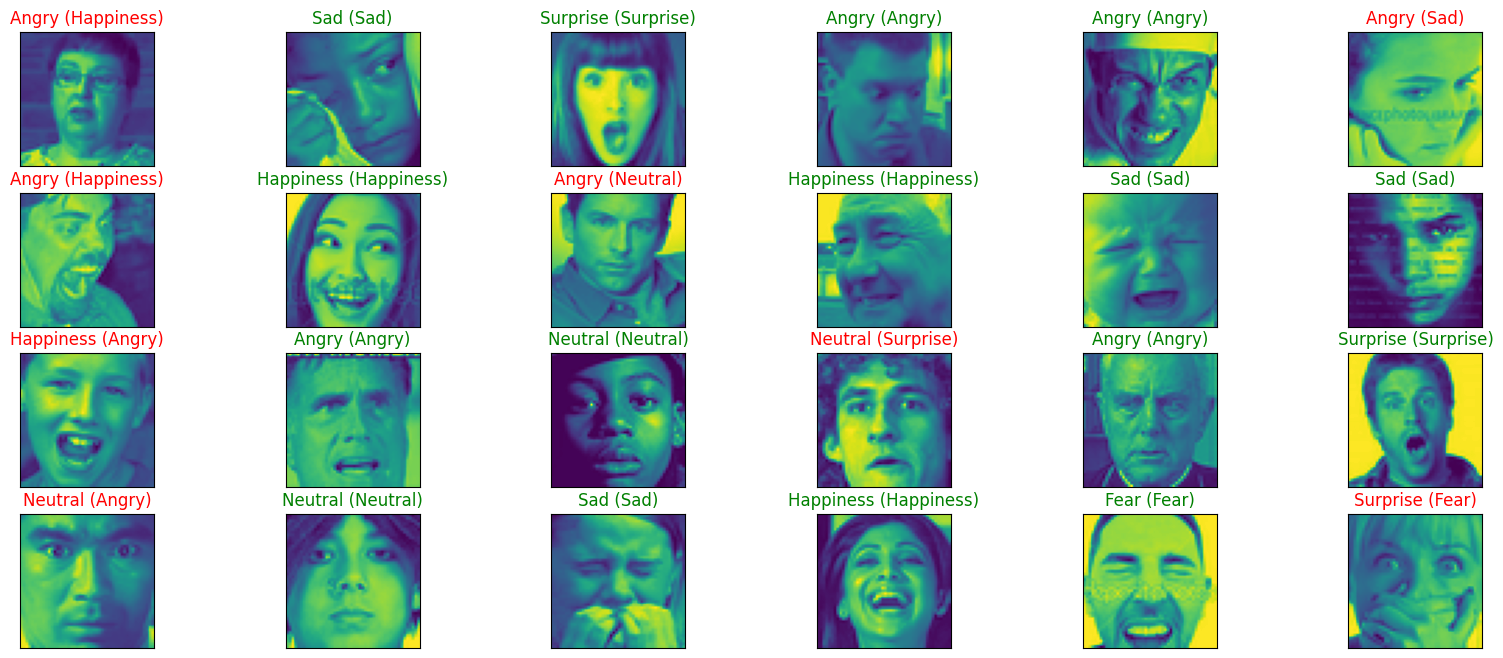

In [ ]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

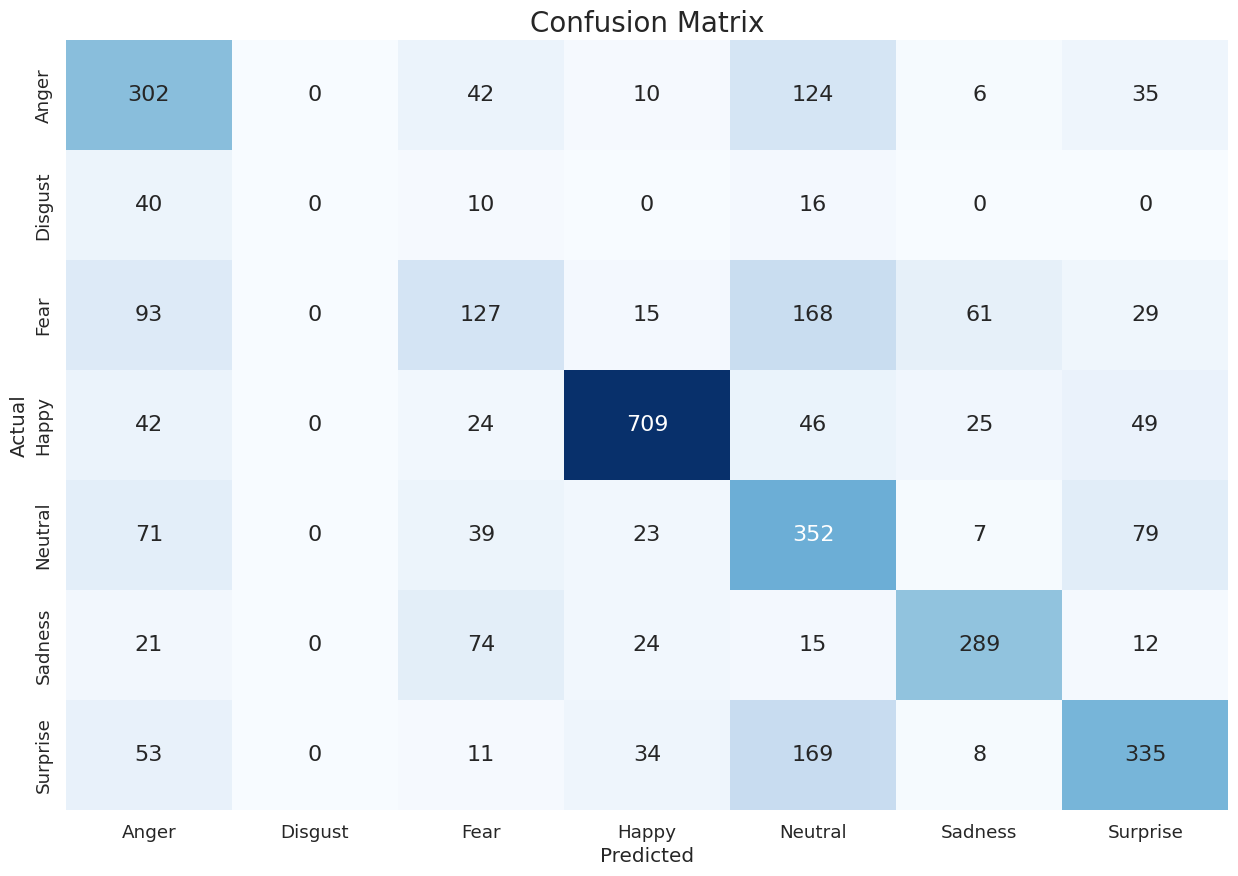

In [ ]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))



              precision    recall  f1-score   support

           0      0.486     0.582     0.529       519
           1      0.000     0.000     0.000        66
           2      0.388     0.258     0.310       493
           3      0.870     0.792     0.829       895
           4      0.396     0.616     0.482       571
           5      0.730     0.664     0.696       435
           6      0.622     0.549     0.583       610

    accuracy                          0.589      3589
   macro avg      0.499     0.495     0.490      3589
weighted avg      0.598     0.589     0.586      3589



In [ ]:
model = cnn_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/30
455/455 [==============================] - ETA: 0s - loss: 14.8450 - accuracy: 0.1617
Epoch 1: val_accuracy did not improve from 0.60248
455/455 [==============================] - 26s 50ms/step - loss: 14.8450 - accuracy: 0.1617 - val_loss: 14.0327 - val_accuracy: 0.2096
Epoch 2/30
455/455 [==============================] - ETA: 0s - loss: 14.3823 - accuracy: 0.1833
Epoch 2: val_accuracy did not improve from 0.60248
455/455 [==============================] - 22s 49ms/step - loss: 14.3823 - accuracy: 0.1833 - val_loss: 13.8038 - val_accuracy: 0.2220
Epoch 3/30
454/455 [============================>.] - ETA: 0s - loss: 14.0504 - accuracy: 0.1922
Epoch 3: val_accuracy did not improve from 0.60248
455/455 [==============================] - 22s 49ms/step - loss: 14.0500 - accuracy: 0.1923 - val_loss: 13.5547 - val_accuracy: 0.2180
Epoch 4/30
455/455 [==============================] - ETA: 0s - loss: 13.7609 - accuracy: 0.1950
Epoch 4: val_accuracy did not improve from 0.60248
455

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 8ms/step - loss: 8.9290 - accuracy: 0.3366
Test Acc: 0.3365840017795563


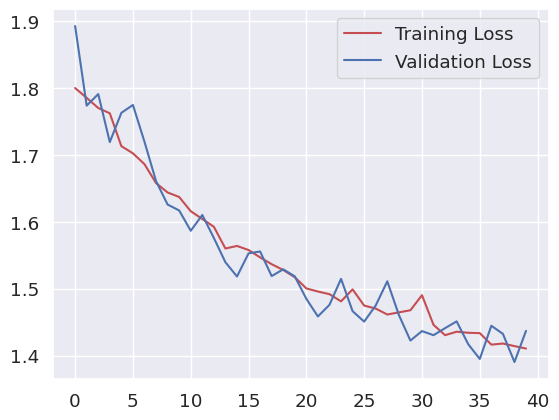

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

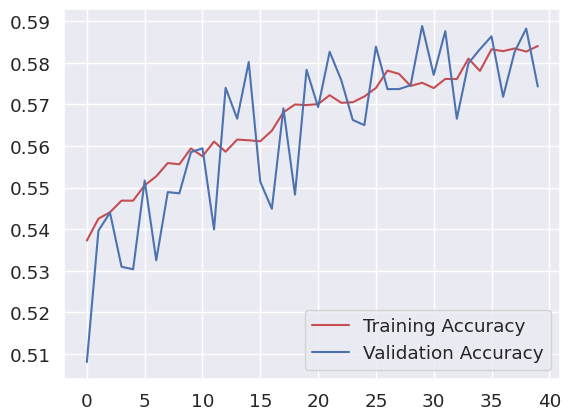

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
model = cnn_model()

In [ ]:
model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 10),
                              ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                              save_best_only=True,mode="max")]

In [ ]:
history = model.fit(train_generator,
                    epochs=50,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/50
454/455 [============================>.] - ETA: 0s - loss: 1.7994 - accuracy: 0.5375
Epoch 1: val_accuracy did not improve from 0.54180
455/455 [==============================] - 37s 81ms/step - loss: 1.7996 - accuracy: 0.5373 - val_loss: 1.8922 - val_accuracy: 0.5080
Epoch 2/50
455/455 [==============================] - ETA: 0s - loss: 1.7849 - accuracy: 0.5425
Epoch 2: val_accuracy did not improve from 0.54180
455/455 [==============================] - 22s 49ms/step - loss: 1.7849 - accuracy: 0.5425 - val_loss: 1.7733 - val_accuracy: 0.5396
Epoch 3/50
455/455 [==============================] - ETA: 0s - loss: 1.7698 - accuracy: 0.5441
Epoch 3: val_accuracy improved from 0.54180 to 0.54396, saving model to best_model.h5
455/455 [==============================] - 21s 47ms/step - loss: 1.7698 - accuracy: 0.5441 - val_loss: 1.7906 - val_accuracy: 0.5440
Epoch 4/50
455/455 [==============================] - ETA: 0s - loss: 1.7619 - accuracy: 0.5469
Epoch 4: val_accuracy did not

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))


113/113 [==============================] - 1s 8ms/step - loss: 1.4211 - accuracy: 0.5890
Test Acc: 0.5890220403671265


In [ ]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 1s 6ms/step


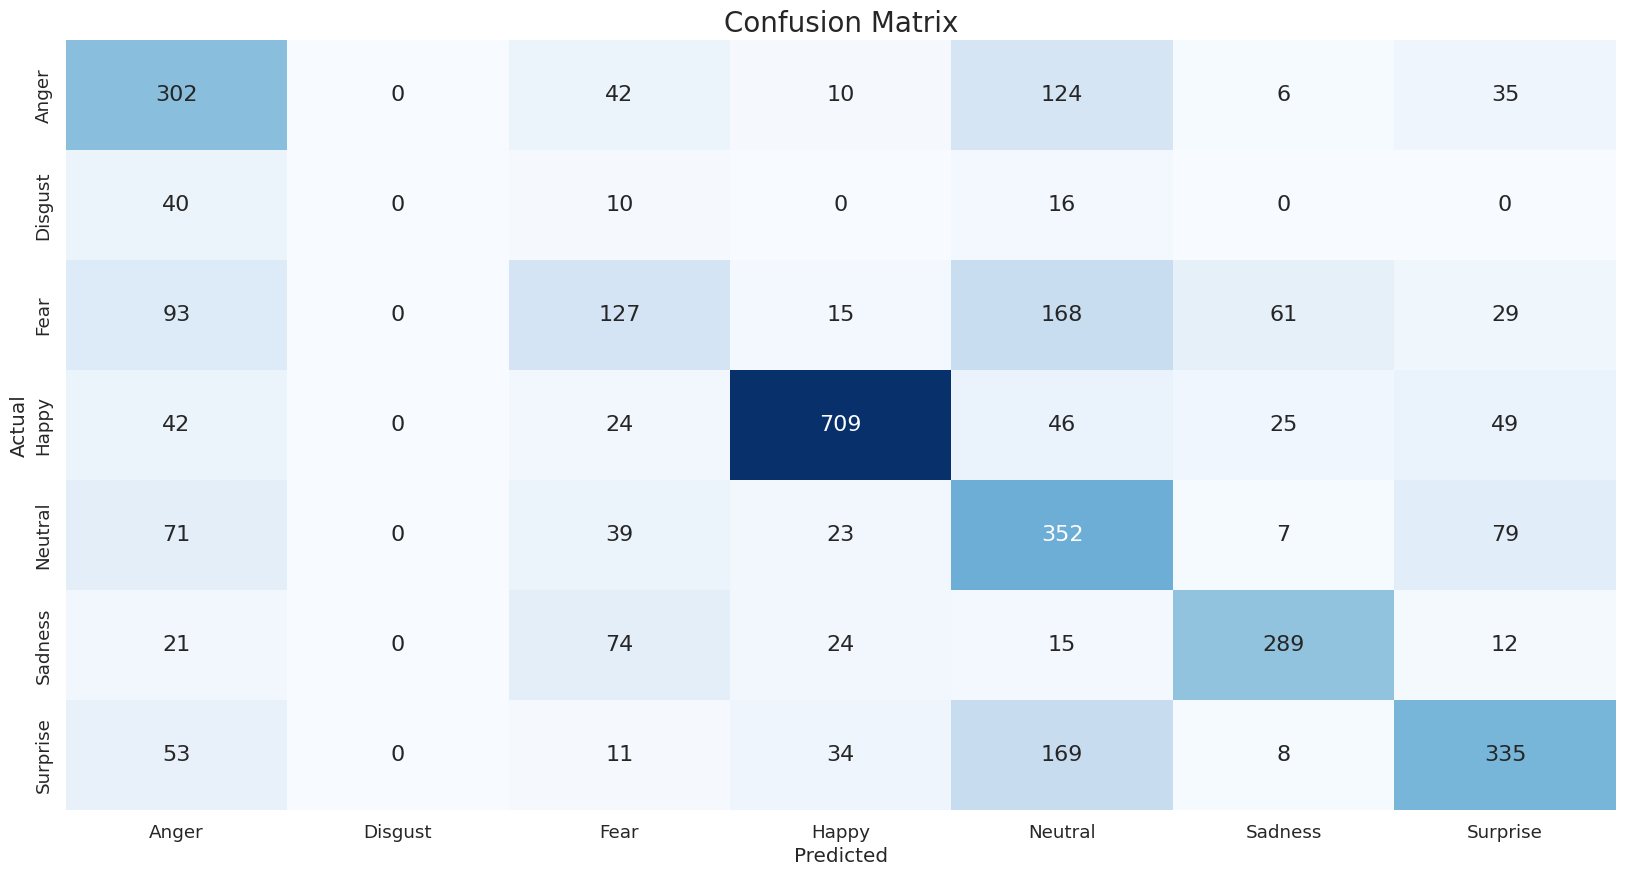

In [ ]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')


In [ ]:
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.486     0.582     0.529       519
           1      0.000     0.000     0.000        66
           2      0.388     0.258     0.310       493
           3      0.870     0.792     0.829       895
           4      0.396     0.616     0.482       571
           5      0.730     0.664     0.696       435
           6      0.622     0.549     0.583       610

    accuracy                          0.589      3589
   macro avg      0.499     0.495     0.490      3589
weighted avg      0.598     0.589     0.586      3589

